# Diabetes Health Indicators Dataset


---

### A Comprehensive Dataset of 100,000 Patient Records for Diabetes Risk Analysis

#### Overview
This dataset contains 100,000 patient records designed for diabetes risk prediction, analysis, and machine learning applications. The dataset is clean, preprocessed, and ready for use in classification, regression, feature engineering, statistical analysis, and data visualization.

#### Link: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

### Author: Rakesh Kolipaka & Ranjith Kumar Digutla

#### License
#### CC0: Public Domain

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('../source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [6]:
data.shape

(100000, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [8]:
data['gender'].value_counts()

gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

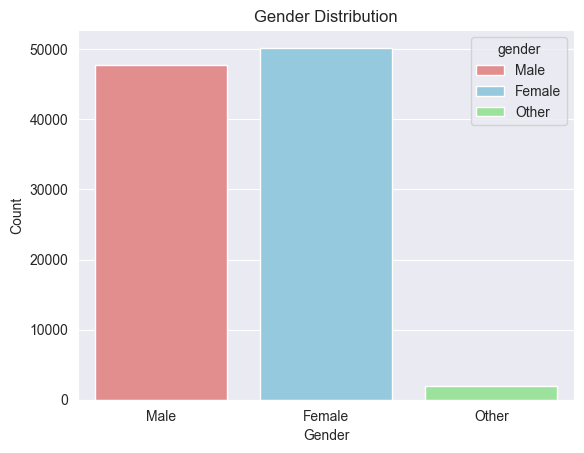

In [9]:
sns.countplot(x='gender', hue='gender', data=data,
              palette=['lightcoral', 'skyblue', 'lightgreen'],
              legend=True)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [10]:
data['ethnicity'].value_counts()

ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

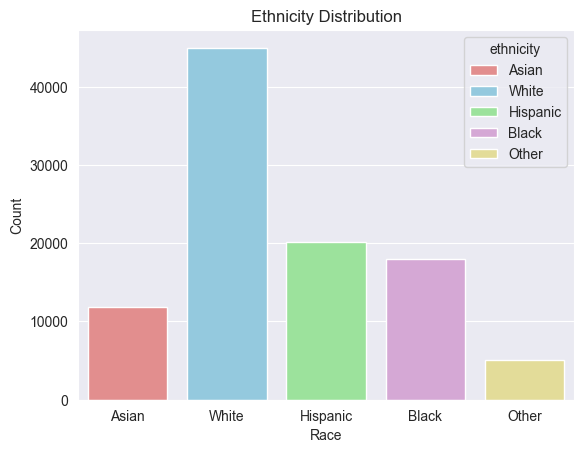

In [11]:
sns.countplot(
    x='ethnicity', hue='ethnicity', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen', 'plum', 'khaki'],
    legend=True
)
plt.title('Ethnicity Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [12]:
data['education_level'].value_counts()

education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

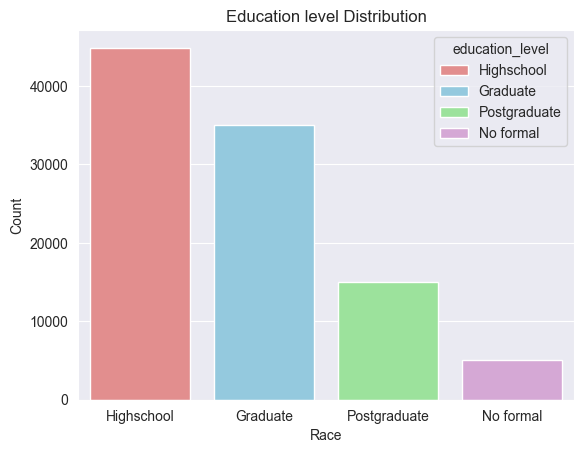

In [13]:
sns.countplot(
    x='education_level', hue='education_level', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen', 'plum'],
    legend=True
)
plt.title('Education level Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [14]:
data['income_level'].value_counts()

income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

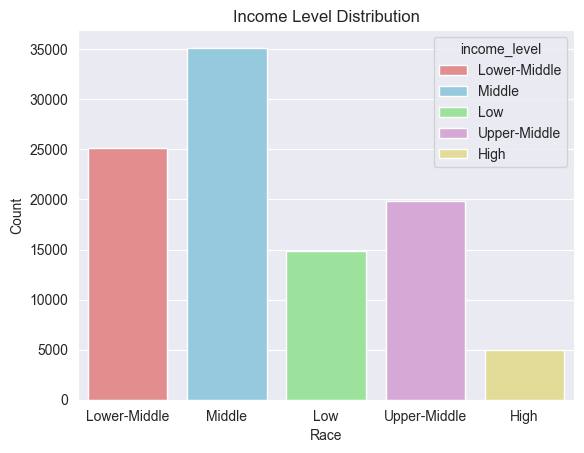

In [15]:
sns.countplot(
    x='income_level', hue='income_level', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen', 'plum', 'khaki'],
    legend=True
)
plt.title('Income Level Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [16]:
data['employment_status'].value_counts()

employment_status
Employed      60175
Retired       21761
Unemployed    11918
Student        6146
Name: count, dtype: int64

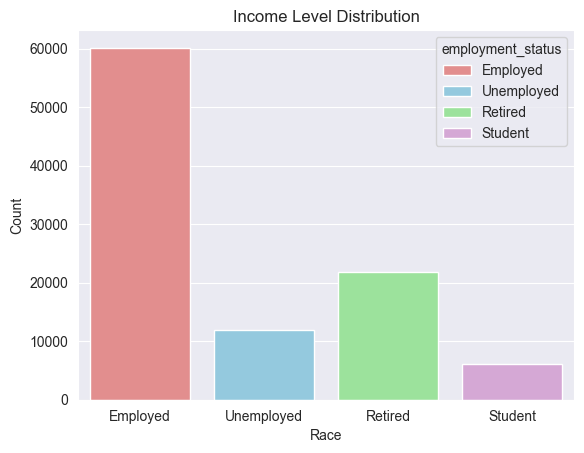

In [17]:
sns.countplot(
    x='employment_status', hue='employment_status', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen', 'plum'],
    legend=True
)
plt.title('Income Level Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [18]:
data['smoking_status'].value_counts()

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

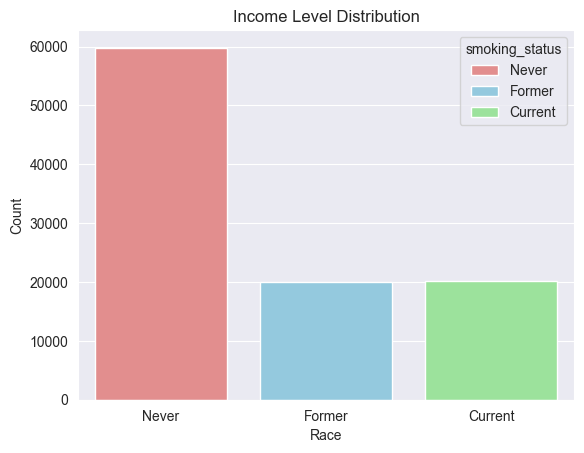

In [19]:
sns.countplot(
    x='smoking_status', hue='smoking_status', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen'],
    legend=True
)
plt.title('Income Level Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [20]:
data['alcohol_consumption_per_week'].value_counts().sort_values(ascending=False)

alcohol_consumption_per_week
2     27119
1     26995
3     17896
0     13535
4      9128
5      3605
6      1264
7       356
8        87
9        13
10        2
Name: count, dtype: int64

In [21]:
data['diabetes_stage'].value_counts()

diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

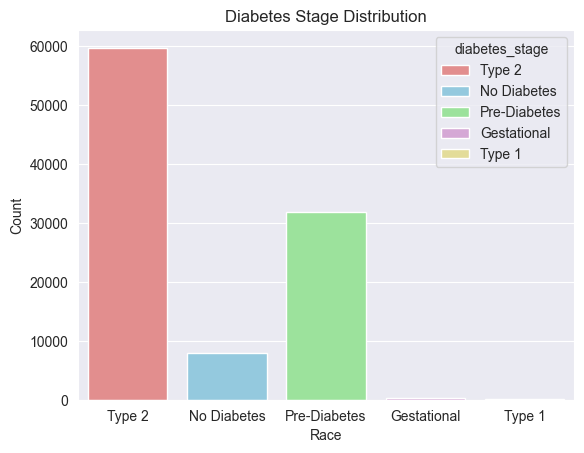

In [22]:
sns.countplot(
    x='diabetes_stage', hue='diabetes_stage', data=data,
    palette=['lightcoral', 'skyblue', 'lightgreen', 'plum', 'khaki'],
    legend=True
)
plt.title('Diabetes Stage Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [23]:
numeric_data = data[['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
                     'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
                     'triglycerides', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']]

numeric_data.describe()

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,118.911640,5.994787,6.997818,5.996468,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,160.035050,9.061242,6.520776,30.222362
std,15.60460,84.409662,1.780954,1.094622,2.468406,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,30.935472,4.954060,0.813921,9.061505
min,18.00000,0.000000,0.000000,3.000000,0.500000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,70.000000,2.000000,4.000000,2.700000
25%,39.00000,57.000000,4.800000,6.300000,4.300000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,139.000000,5.090000,5.970000,23.800000
50%,50.00000,100.000000,6.000000,7.000000,6.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,160.000000,8.790000,6.520000,29.000000
75%,61.00000,160.000000,7.200000,7.700000,7.700000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,181.000000,12.450000,7.070000,35.600000
max,90.00000,833.000000,10.000000,10.000000,16.800000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,287.000000,32.220000,9.800000,67.200000


In [25]:
data.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [ ]:
т